In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [17]:
# specifiy location of tradition data
df_trad = pd.read_csv("/home/rthoms/ocean_dep/sur_B/trad_table_clean.csv")
df_trad.sg_dep_cat = pd.Categorical(df_trad.sg_dep_cat,categories=["none","mod","high"],ordered=True)
df_trad.scientific = pd.Categorical(df_trad.scientific,categories=
                                    ['Sillago sihama', 'Gerres oyena', 'Gerres longirostris',
                                    'Teraponidae', 'Crenidens crenidens', 'Caranginae',
                                    'Rastrellinger kanagurta', 'Portunus pelagicus', 'scylla serrata ',
                                    'Penaeus monodon', 'Loliginidae', 'Penaeidae', 'Pinna muricata',
                                    'Margaritidae', 'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                    'Garfarium pectinatum', 'Serratina capsoides', 'Callista florida',
                                    'Potamididae', 'Volema pyrum'],ordered=True)
df_trad.sort_values("resource_id", inplace=True)

In [18]:
# specifiy location of social data
df_soc = pd.read_csv("/home/rthoms/ocean_dep/sur_B/soc_table_clean.csv")
df_soc.sg_dep_cat = pd.Categorical(df_soc.sg_dep_cat,categories=["none","mod","high"],ordered=True)
df_soc.scientific = pd.Categorical(df_soc.scientific,categories=
                                    ['Sillago sihama', 'Gerres oyena', 'Gerres longirostris',
                                    'Teraponidae', 'Crenidens crenidens', 'Caranginae',
                                    'Rastrellinger kanagurta', 'Portunus pelagicus', 'scylla serrata ',
                                    'Penaeus monodon', 'Loliginidae', 'Penaeidae', 'Pinna muricata',
                                    'Margaritidae', 'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                    'Garfarium pectinatum', 'Serratina capsoides', 'Callista florida',
                                    'Potamididae', 'Volema pyrum'],ordered=True)
df_soc.sort_values("resource_id", inplace=True)

In [19]:
# specifiy location of identity data
df_iden = pd.read_csv("/home/rthoms/ocean_dep/sur_B/iden_table_clean.csv")
df_iden.sg_dep_cat = pd.Categorical(df_iden.sg_dep_cat,categories=["none","mod","high"],ordered=True)
df_iden.scientific = pd.Categorical(df_iden.scientific,categories=
                                    ['Sillago sihama', 'Gerres oyena', 'Gerres longirostris',
                                    'Teraponidae', 'Crenidens crenidens', 'Caranginae',
                                    'Rastrellinger kanagurta', 'Portunus pelagicus', 'scylla serrata ',
                                    'Penaeus monodon', 'Loliginidae', 'Penaeidae', 'Pinna muricata',
                                    'Margaritidae', 'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                    'Garfarium pectinatum', 'Serratina capsoides', 'Callista florida',
                                    'Potamididae', 'Volema pyrum'],ordered=True)
df_iden.sort_values("resource_id", inplace=True)

In [20]:
sample_dict={'fish': 48, 'glean': 32, 'shrimp_net': 32}

## Tradition

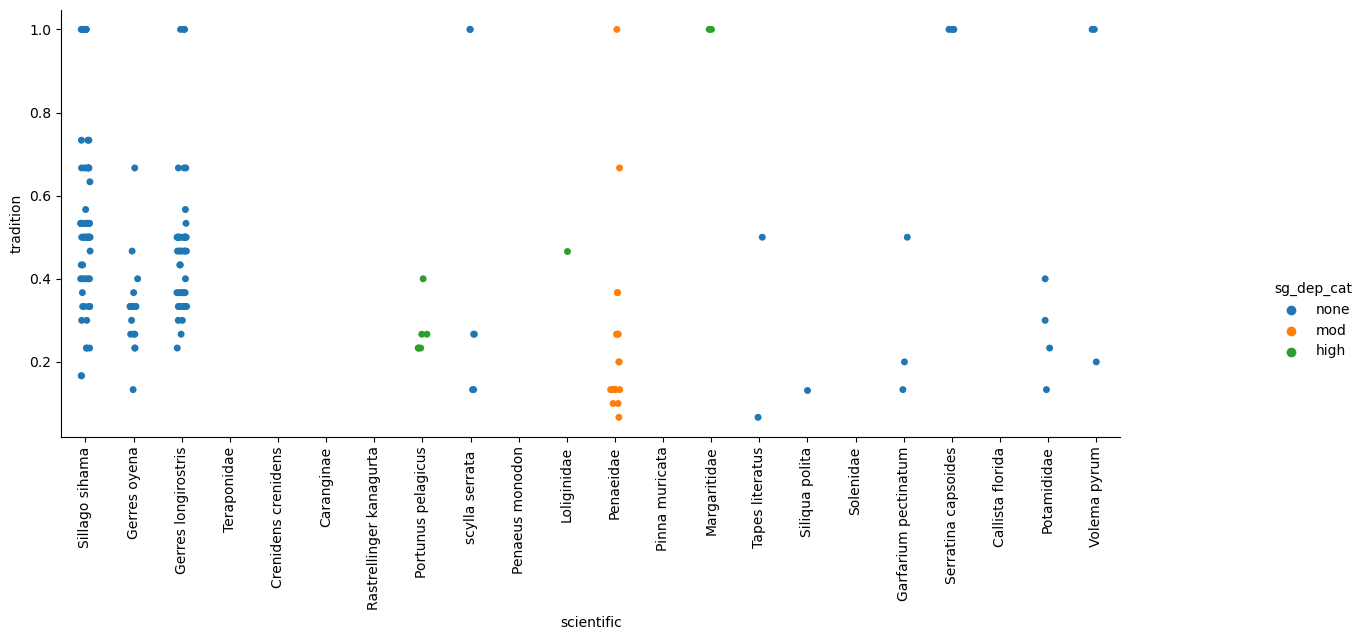

In [21]:
ax= sns.catplot(data=df_trad.sort_values('scientific'), x="scientific", y="tradition", hue = 'sg_dep_cat')
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)

In [22]:
def weighted_av(pract,med, count):
    sample_size=sample_dict[pract]
    wa= med*(int(count)/sample_size)
    return wa

In [23]:
df_trad_agg = df_trad.groupby(['scientific','pract_cat']).agg(tradition_med=('tradition', np.median), count = ('id', 'count'), sg_dep_cat= ('sg_dep_cat', 'first')).reset_index() 
df_trad_agg['weighted_av'] = df_trad_agg.apply(lambda row: weighted_av(row['pract_cat'], row['tradition_med'],  row['count']), axis=1)
df_trad_agg

,scientific,pract_cat,tradition_med,count,sg_dep_cat,weighted_av
0,Sillago sihama,fish,0.500000,34,none,0.354167
1,Sillago sihama,glean,0.533333,19,none,0.316667
2,Sillago sihama,shrimp_net,0.500000,18,none,0.281250
3,Gerres oyena,fish,0.333333,10,none,0.069444
4,Gerres oyena,glean,0.333333,3,none,0.031250
...,...,...,...,...,...,...
61,Potamididae,glean,NaN,0,NaN,NaN
62,Potamididae,shrimp_net,0.300000,1,none,0.009375
63,Volema pyrum,fish,1.000000,2,none,0.041667
64,Volema pyrum,glean,NaN,0,NaN,NaN


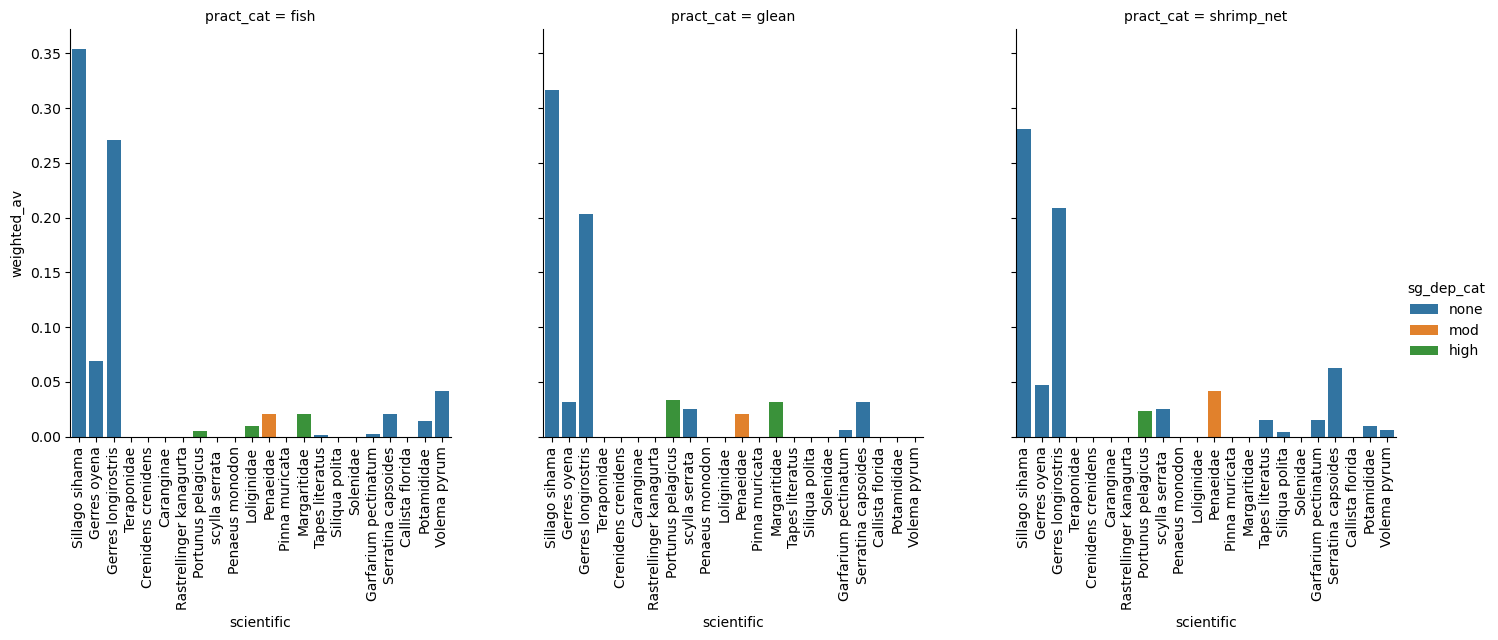

In [24]:
ax= sns.catplot(data=df_trad_agg, x="scientific", y="weighted_av", kind = 'bar', col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)

## Social Union

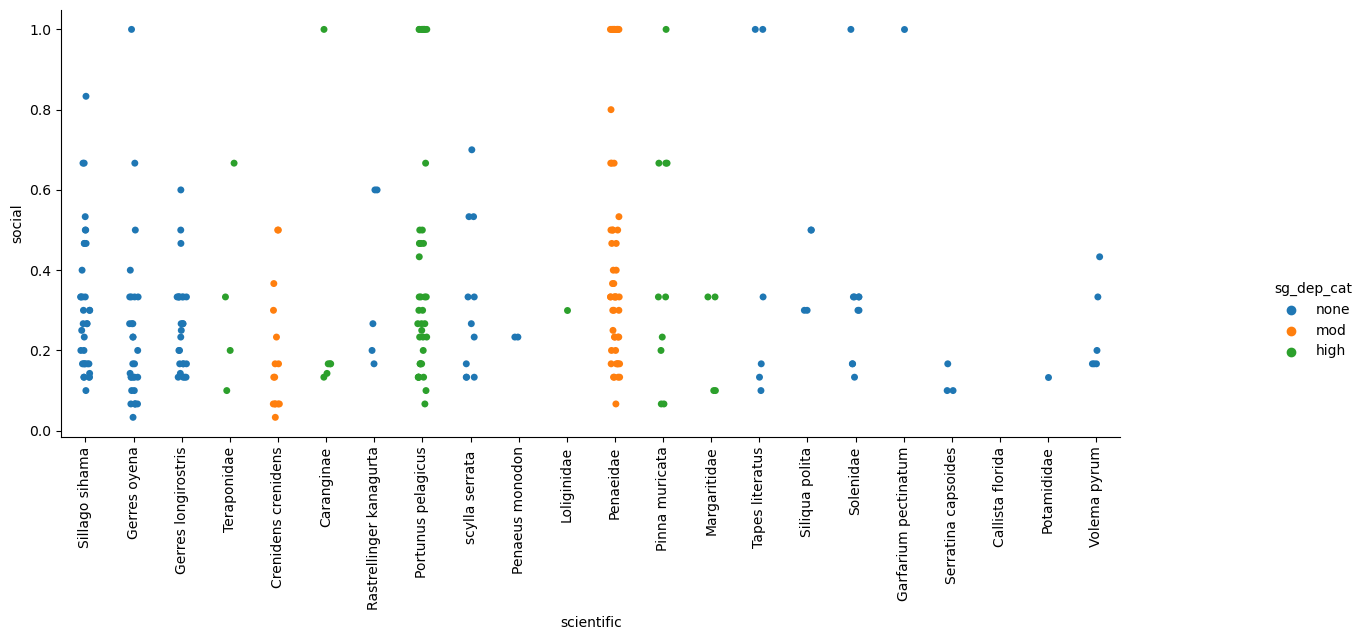

In [25]:
ax= sns.catplot(data=df_soc.sort_values('scientific'), x="scientific", y="social", hue = 'sg_dep_cat' )
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)

In [26]:
df_soc_agg = df_soc.groupby(['scientific','pract_cat']).agg(soc_med=('social', np.median), count = ('id', 'count'), sg_dep_cat= ('sg_dep_cat', 'first')).reset_index() 
df_soc_agg['weighted_av'] = df_soc_agg.apply(lambda row: weighted_av(row['pract_cat'], row['soc_med'],  row['count']), axis=1)
df_soc_agg

,scientific,pract_cat,soc_med,count,sg_dep_cat,weighted_av
0,Sillago sihama,fish,0.241667,28,none,0.140972
1,Sillago sihama,glean,0.300000,4,none,0.037500
2,Sillago sihama,shrimp_net,0.316667,6,none,0.059375
3,Gerres oyena,fish,0.183333,20,none,0.076389
4,Gerres oyena,glean,0.133333,3,none,0.012500
...,...,...,...,...,...,...
61,Potamididae,glean,NaN,0,NaN,NaN
62,Potamididae,shrimp_net,NaN,0,NaN,NaN
63,Volema pyrum,fish,0.166667,3,none,0.010417
64,Volema pyrum,glean,0.250000,2,none,0.015625


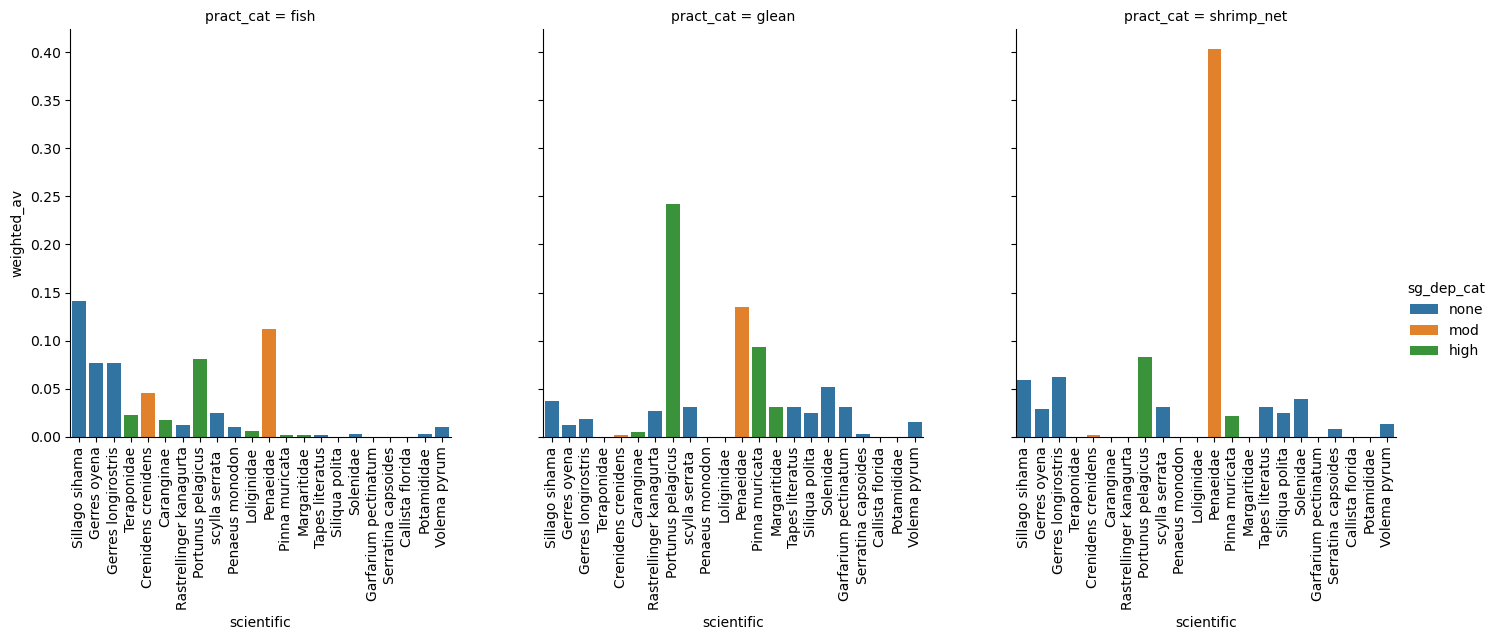

In [27]:
ax= sns.catplot(data=df_soc_agg, x="scientific", y="weighted_av", kind = 'bar', col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)

## Identity

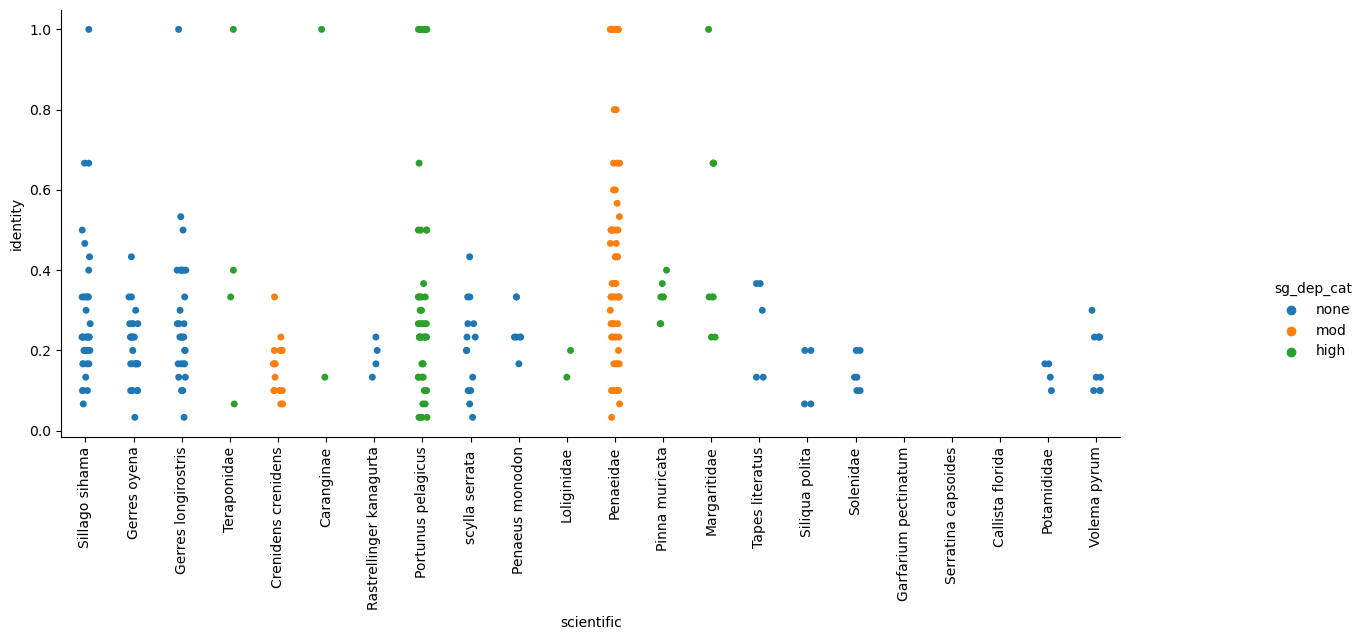

In [28]:
ax= sns.catplot(data=df_iden.sort_values('scientific'), x="scientific", y="identity", hue = 'sg_dep_cat' )
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)

In [29]:
df_iden_agg = df_iden.groupby(['scientific','pract_cat']).agg(iden_med=('identity', np.median), count = ('id', 'count'), sg_dep_cat= ('sg_dep_cat', 'first')).reset_index() 
df_iden_agg['weighted_av'] = df_iden_agg.apply(lambda row: weighted_av(row['pract_cat'], row['iden_med'],  row['count']), axis=1)
df_iden_agg

,scientific,pract_cat,iden_med,count,sg_dep_cat,weighted_av
0,Sillago sihama,fish,0.233333,26,none,0.126389
1,Sillago sihama,glean,0.283333,4,none,0.035417
2,Sillago sihama,shrimp_net,0.233333,7,none,0.051042
3,Gerres oyena,fish,0.166667,14,none,0.048611
4,Gerres oyena,glean,0.283333,4,none,0.035417
...,...,...,...,...,...,...
61,Potamididae,glean,0.166667,1,none,0.005208
62,Potamididae,shrimp_net,0.133333,2,none,0.008333
63,Volema pyrum,fish,0.116667,4,none,0.009722
64,Volema pyrum,glean,0.266667,2,none,0.016667


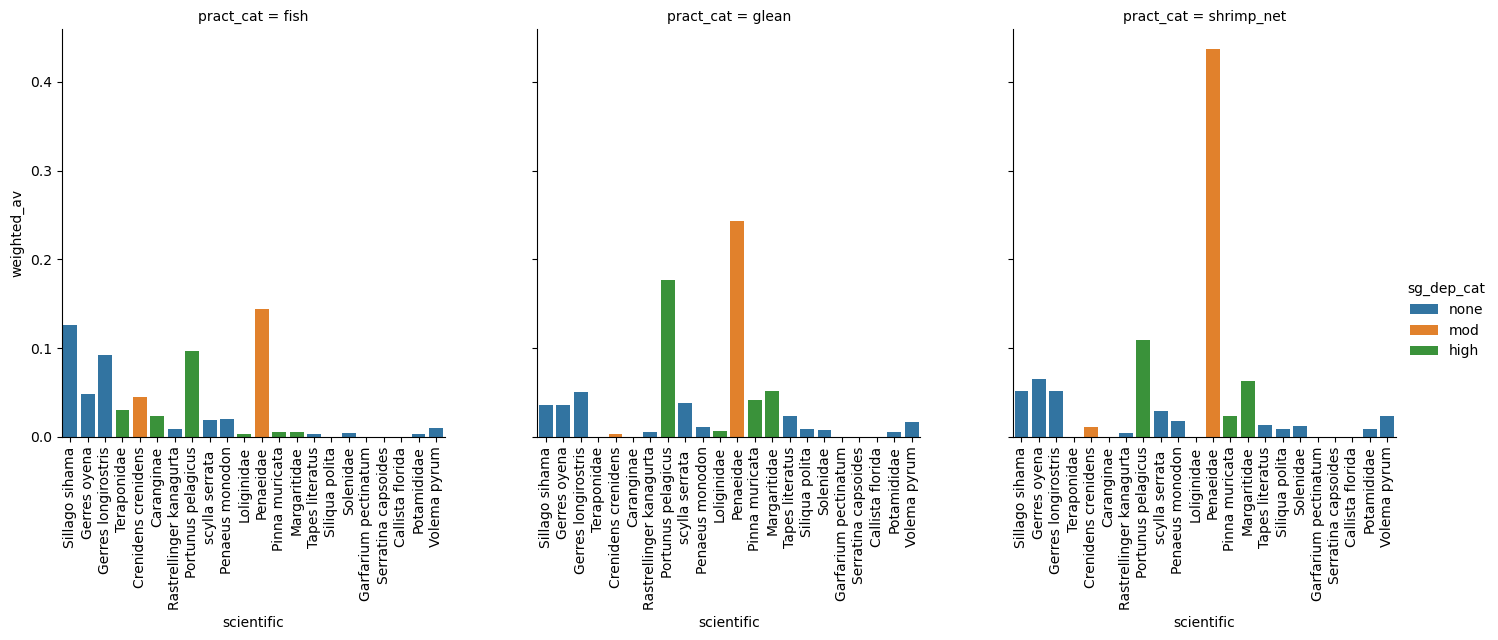

In [30]:
ax= sns.catplot(data=df_iden_agg, x="scientific", y="weighted_av", kind = 'bar', col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(15,5)
ax.set_xticklabels(rotation=90)